In [6]:
# importing the necessary libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import networkx as nx
import matplotlib.pyplot as plt

# loading and cleaning text

In [7]:
# loading up the text, tokenizing
raw = open("orlando.txt").read()
o_tokens = nltk.word_tokenize(raw)

# slicing the front and back matter
o_text = o_tokens[872:-5]

# instatiating an NLTK Text class
orl = nltk.Text(o_text)
orl

# removing punctuation
lower_no_punct = [word.lower() for word in orl if word.isalpha()]

# removing stops
stops = stopwords.words('english')
no_stops = [word for word in lower_no_punct if word not in stops]

# lemmatizing
clean_text = [WordNetLemmatizer.lemmatize(word, word) for word in no_stops]

orl = clean_text

# computing similarity first level

In [9]:
# to make these lists of distictive similar words automatically, 
# use ContextIndex class
idx = nltk.text.ContextIndex(orl)

# put words similar to woman in a list
woman_sim_1 = idx.similar_words("woman")

# put words similar to man in a list
man_sim_1 = idx.similar_words("man")
man_sim_1

# loops through woman similar and filters out words shared with man similar
woman_disc_1 = []
for word in woman_sim_1:
    if word not in man_sim_1:
        woman_disc_1.append(word)

# loops through man similar and filters out words shared with woman similar
man_disc_1 = []
for word in man_sim_1:
    if word not in woman_sim_1:
        man_disc_1.append(word)

# computing similarity second level

In [10]:
## for woman

# loop that computes similar words for each word from woman_sim_1
woman_sim_2_nested = []
for word in woman_disc_1:
    woman_sim_2_nested.append(idx.similar_words(word)) # this returns nested lists

# list comprehension that flattens nested list
woman_sim_2 = [inner
    for outer in woman_sim_2_nested
        for inner in outer]

## for man

# creating a loop to find similar words to man_sim_1
man_sim_2_nested = []
for word in man_sim_1:
    man_sim_2_nested.append(idx.similar_words(word))
man_sim_2_nested

# collapsing the nested list
man_sim_2 = [inner
    for outer in man_sim_2_nested
        for inner in outer]

## distintive words

# loops through woman similar and filters out words shared with man similar to create distinctive male terms
woman_disc_2 = []
for word in woman_sim_2:
    if word not in man_sim_2:
        woman_disc_2.append(word)

# loops through man similar and filters out words shared with woman similar to create distinctive male terms
man_disc_2 = []
for word in man_sim_2:
    if word not in woman_sim_2:
        man_disc_2.append(word)

# computing similarity third level 

In [12]:
# 3rd level words similar to woman_disc_2
woman_sim_3_nested = []
for word in woman_sim_2:
    woman_sim_3_nested.append(idx.similar_words(word)) # this returns nested lists

# list comprehension that flattens nested list
woman_sim_3 = [inner
    for outer in woman_sim_3_nested
        for inner in outer]

# 3rd level words similar to man_disc_2
man_sim_3_nested = []
for word in man_sim_2:
    man_sim_3_nested.append(idx.similar_words(word)) # this returns nested lists

# list comprehension that flattens nested list
man_sim_3 = [inner
    for outer in man_sim_3_nested
        for inner in outer]

# 3rd level words similar to man_disc_2
man_sim_3_nested = []
for word in man_sim_2:
    man_sim_3_nested.append(idx.similar_words(word)) # this returns nested lists

# list comprehension that flattens nested list
man_sim_3 = [inner
    for outer in man_sim_3_nested
        for inner in outer]

# loops through woman similar and filters out words shared with man similar
man_disc_3 = []
for word in man_sim_3:
    if word not in woman_sim_3:
        man_disc_3.append(word)

# Visualizing

In [2]:
G = nx.Graph()

# first level similar: woman

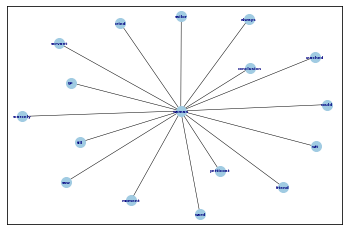

In [3]:
# adding first level nodes similar to 'woman'
woman_1_dict = {
    # first level similar words to woman:
    'woman': ['reached', 'till', 'friend', 'word', 'moment', 'saw', 
              'always', 'could', 'cried', 'sailor', 'wit', 'scarcely', 
              'petticoat', 'go', 'servant', 'conclusion']
}

# create second graph object passing dict of nodes/edges
g1 = nx.Graph(woman_1_dict)
# https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html
plot = nx.draw_networkx(g1, pos=None, arrows=None, with_labels=True, node_size=100, node_color="#A0CBE2", font_size=4, font_color="navy", font_weight="bold", width=.5)

# uncomment below to save the image
plt.savefig("first_level_woman.png", dpi=1000)

# second level similar: woman

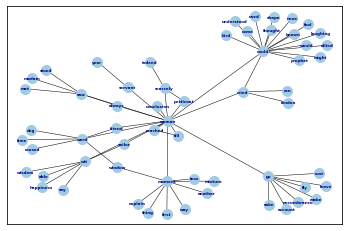

In [4]:
woman_2_dict = {
    # first level similar words to woman:
    'woman': ['reached', 'till', 'friend', 'word', 'moment', 'saw', 'always', 'could', 'cried', 'sailor', 'wit', 'scarcely', 'petticoat', 'go', 'servant', 'conclusion'],
    # second level similar words to woman:
    'reached': ['till'],
    'till': ['reached'],
    'friend': ['word'],
    'word': ['friend', 'woman', 'time', 'dog', 'window', 'roused'],
    'moment': ['explain', 'thing', 'another', 'mixture', 'toss', 'way', 'window', 'first'],
    'saw': ['always', 'met', 'madam', 'stood'],
    'could': ['might', 'used', 'understood', 'prophet', 'bird', 'thought', 'come', 'shape', 'none', 'would', 'cried', 'allied', 'known', 'laughing', 'fool'],
    'cried': ['london', 'could', 'ran'],
    'sailor': ['wit'],
    'wit': ['able', 'happiness', 'wisdom', 'sailor', 'say'], 
    'scarcely': ['indeed'], 
    'petticoat': ['scarcely'], 
    'go': ['encumbrance', 'account', 'fly', 'leave', 'rust', 'make', 'sake'], 
    'servant': ['year'], 
    'conclusion': []
}

# create second graph object passing dict of nodes/edges
g2 = nx.Graph(woman_2_dict)

plot = nx.draw_networkx(g2, pos=None, arrows=None, with_labels=True, node_size=100, node_color="#A0CBE2", font_size=4, font_color="navy", font_weight="bold", width=.5)

# uncomment below to save the image
plt.savefig("second_level_woman.png", dpi=1000)